# Outliers

3 Sigma Technique(Standard Deviation)

In [52]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import statistics
import seaborn as sns


In [3]:
df = pd.read_csv('raw_sales.csv')

In [4]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Lets make a function to detect the outlier

In [7]:
def Outlier_detector(data):
    outliers = []

    # setting the lower and upper limit
    std = statistics.stdev(data)
    mean = statistics.mean(data)

    cutoff = std * 3

    lower_limit = mean - cutoff
    upper_limit = mean + cutoff

    # generate outlier 
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)

    return outliers

In [11]:
outliers = Outlier_detector(df['price'])

In [49]:
print(f'Total Datapoints : {len(df['price'])}\nTotal Outliers : {len(outliers)}\nTotal percentage of Outlier : {round((len(outliers)/len(df['price']))*100,2)}')

Total Datapoints : 29580
Total Outliers : 461
Total percentage of Outlier : 1.56


IF the data is fully normally distributed it should have 0.3% of outlier 

In [50]:
df.price.skew()

np.float64(4.312009366902366)

In [51]:
df['price'].skew()

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

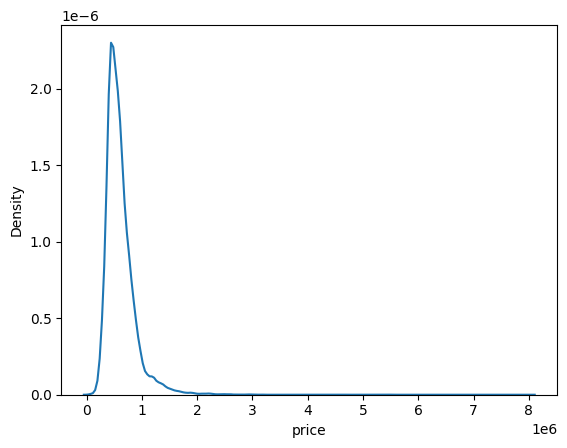

In [53]:
# lets see thisd through the visualization 
sns.kdeplot(df['price'])

As we can clearly see the data is right skwed

with log transformer we can somehow change the distribution of the skwed data into normal distributed data

In [59]:
df['price_transformed'] = np.log(df['price'])

<Axes: xlabel='price_transformed', ylabel='Density'>

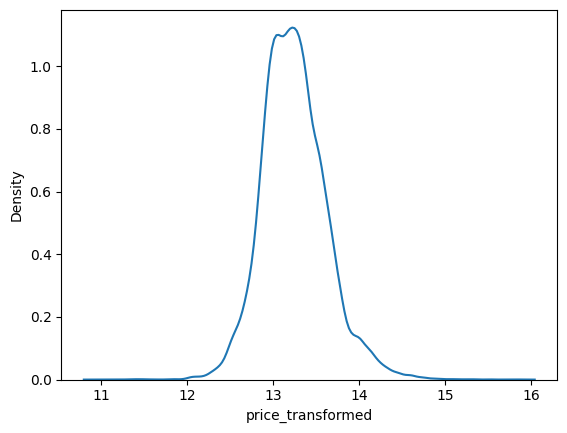

In [61]:
sns.kdeplot(df['price_transformed'])

In [60]:
len(Outlier_detector(df['price_transformed']))

266

In [62]:
# lets try to transform it again
df['Price_transformed_2'] = np.log(df['price_transformed'])

In [64]:
len(Outlier_detector(df['Price_transformed_2']))

251

<Axes: xlabel='Price_transformed_2', ylabel='Density'>

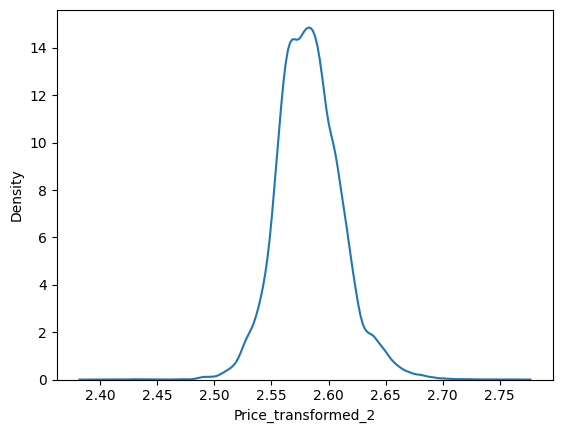

In [66]:
sns.kdeplot(df['Price_transformed_2'])

<Axes: >

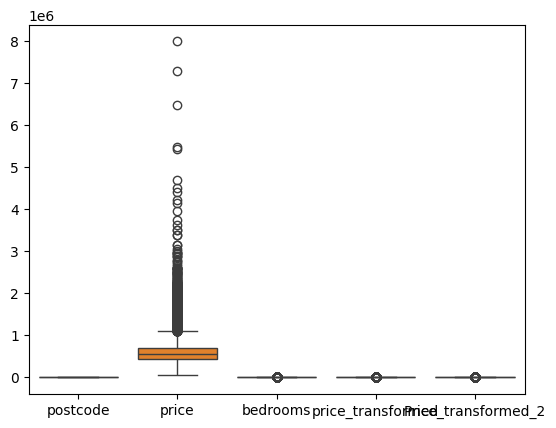

In [67]:
# Boxplots

sns.boxplot(data=df)

<Axes: ylabel='Price_transformed_2'>

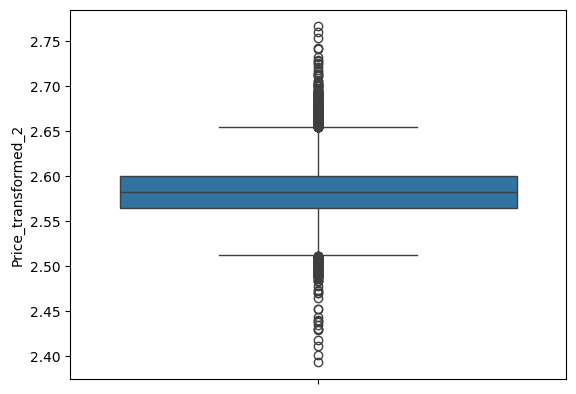

In [68]:
sns.boxplot(data=df['Price_transformed_2'])

Inter Quartile Range

In [120]:
lst = [12,43,54,56,61,62,66,68,69,69,70,71,72,77,78,79,85,87,88,89,93,95,96,99,99,99,10032]

In [108]:
len(lst)

27

In [109]:
np.mean(lst)

np.float64(443.2962962962963)

In [110]:
statistics.mean(lst)

443.2962962962963

In [111]:
q1,q3= np.percentile(lst,[25,75])

In [112]:
q1,q3

(np.float64(67.0), np.float64(91.0))

In [113]:
IQR = q3 - q1

In [114]:
# lets find the upper and lower fence 

lower_lence = q1 - (1.5 * IQR)
upper_fence = q3 + (1.5 * IQR)

In [115]:
lower_lence, upper_fence

(np.float64(31.0), np.float64(127.0))

In [121]:
# lets again make a function

def Outlier(data):
    out = []
    threshold = 3 # 3rd standard deviation
    mean = np.mean(data)
    std = np.std(data)

    for i in lst:
        z_score = (i - mean ) /std
        if np.abs(z_score)> threshold:
            out.append(i)
    return out

In [122]:
Outlier(lst)

[10032]

# So this is it